# me 8.99 Homework - Dino or Dragon?

## Getting files

In [1]:
#!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip

In [2]:
#!unzip dino-dragon.zip

In [3]:
!dir train/dino/*

train/dino/008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg
train/dino/00b7f1d3-9265-4971-9c51-4686ce97eadd.jpg
train/dino/014d6937-456a-4d13-bf79-2518ef128ff1.jpg
train/dino/0151c4fc-b507-4f1d-8de6-c2f2c3aa362d.jpg
train/dino/01d2e297-ae2b-41c0-833b-688f51ce5f22.jpg
train/dino/01e736f2-4de6-441a-97e9-3542c8484cef.jpg
train/dino/025064bc-4bac-495a-84a3-8aed84a8d7c5.jpg
train/dino/025bf316-ec72-40cf-9350-ca3580d2786b.jpg
train/dino/0262c96d-f37d-425a-ae95-00e01e0cd8f5.jpg
train/dino/0284b36b-b92c-4c1d-a8d7-4ba26f7bfe83.jpg
train/dino/02a9111f-9430-4046-a031-8b1773e038d0.jpg
train/dino/037bca5f-0ff8-4cfe-b317-d6274d20d95a.jpg
train/dino/03958547-38fc-4635-abfb-3bc6b3a1e540.jpg
train/dino/04293d5b-d47b-475e-b6c5-fa4928c31df7.jpg
train/dino/043fcd43-3470-4e9d-9671-fab035be807a.jpg
train/dino/0472656b-f6d8-4a5f-8a04-34f851a5b939.jpg
train/dino/047c2089-8134-4810-8e36-9da0923c9c18.jpg
train/dino/04ce35d8-f257-45bc-b1b0-69cc5cdae2d1.jpg
train/dino/0597a5c2-dd9a-48a2-8e45-b9da7548427b.jpg
train/dino/0

In [4]:
!dir train/dragon/*

train/dragon/000bf8e2-6467-462f-b4c8-61c78f94241b.jpg
train/dragon/0065e007-931f-4a67-ae27-7708e090cb26.jpg
train/dragon/00af6fd7-5484-4e59-b974-761a5c36a16e.jpg
train/dragon/00fb9fec-4f3e-454e-b804-7709f98d87fe.jpg
train/dragon/011689fa-0178-4721-bcb0-6e63c6814a98.jpg
train/dragon/01ca280a-e99c-457f-9eac-68d280e2569c.jpg
train/dragon/0226f61b-95d8-4aaf-9c4a-b1d2177edb38.jpg
train/dragon/024eadf4-3a93-4c4b-8e46-01c36700906e.jpg
train/dragon/0290e78f-5d8d-454f-953a-72f831eee71e.jpg
train/dragon/03c4c938-02b3-40f6-b40b-847eac02657e.jpg
train/dragon/05106332-cb36-4621-b35d-d0eb100e8e73.jpg
train/dragon/05d01932-8009-4535-8ec0-77b68c60a89b.jpg
train/dragon/05fea1a2-4bfa-498d-842d-582003f219b7.jpg
train/dragon/060d636a-6cd7-490e-9a64-aa6e85c7e9a7.jpg
train/dragon/0658ae66-0e2f-4b0f-90ff-acbc621fe0f2.jpg
train/dragon/06603f1a-ad1b-401c-9ad8-dd1319976cb9.jpg
train/dragon/066a0e02-6e35-4130-8920-e1602754e006.jpg
train/dragon/06d302db-71a1-4be8-8b04-7cc1d6bc4702.jpg
train/dragon/06d94bff-a209-4

## Imports

In [5]:
import numpy as npy
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import tensorflow as tsf
from tensorflow import keras

2022-11-21 16:56:40.240600: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [7]:
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
tsf.__version__

'2.9.1'

### Test load image(s)

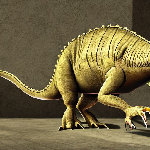

In [9]:
path = './train/dino/'
name = 'fd65880b-d3e4-412a-85a3-2270811369c2.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

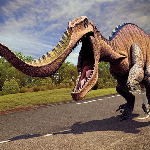

In [10]:
name = '008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

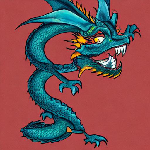

In [11]:
path = './train/dragon/'
name = '76ed968f-8c7f-4b77-8427-44f9743980f5.jpg'
fullname = f'{path}/{name}'
load_img(fullname , target_size=(150, 150))

## Create Model

You need to develop the model with following structure:

- The shape for input should be (150, 150, 3)
- Next, create a convolutional layer (Conv2D):
- Use 32 filters
- Kernel size should be (3, 3) (that's the size of the filter)
- Use 'relu' as activation
- Reduce the size of the feature map with max pooling (MaxPooling2D)
- Set the pooling size to (2, 2)
- Turn the multi-dimensional result into vectors using a Flatten layer
- Next, add a Dense layer with 64 neurons and 'relu' activation
- Finally, create the Dense layer with 1 neuron - this will be the output
- The output layer should have an activation - use the appropriate activation for the binary classification case
- As optimizer use SGD with the following parameters:
SGD(lr=0.002, momentum=0.8)



In [12]:
input_shape = (150, 150, 3)

In [13]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), 
                        activation='relu',
                        input_shape=input_shape )
         )
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-21 16:56:42.088832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 16:56:42.095573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 16:56:42.096183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 16:56:42.097193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

## Q1 = binary crossentropy

In [14]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [15]:
model.name

'sequential'

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

## Q2 = 11214912

## Image Generator

In [17]:
# Training
idgTra = ImageDataGenerator(rescale=1./255)
idgTra.rescale

0.00392156862745098

In [18]:
genTra = idgTra.flow_from_directory(
    'train/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 1594 images belonging to 2 classes.


In [19]:
genTra.batch_size

20

In [20]:
# Validation
idgVal = ImageDataGenerator(rescale=1./255)
idgVal.rescale

0.00392156862745098

In [21]:
genVal = idgVal.flow_from_directory(
    'test/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 394 images belonging to 2 classes.


## First Training

In [22]:
history = model.fit(
    genTra,
    epochs=10,
    validation_data=genVal
)

Epoch 1/10


2022-11-21 16:56:44.413089: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-21 16:56:45.050408: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 16:56:45.051283: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 16:56:45.051322: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-21 16:56:45.052203: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-21 16:56:45.052288: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


80/80 [==============================] - 11s 108ms/step - loss: 0.6001 - acc: 0.6895 - val_loss: 0.4810 - val_acc: 0.8223
Epoch 2/10
80/80 [==============================] - 8s 106ms/step - loss: 0.4423 - acc: 0.8093 - val_loss: 0.4011 - val_acc: 0.8426
Epoch 3/10
80/80 [==============================] - 9s 107ms/step - loss: 0.3636 - acc: 0.8501 - val_loss: 0.3375 - val_acc: 0.8680
Epoch 4/10
80/80 [==============================] - 9s 106ms/step - loss: 0.3263 - acc: 0.8689 - val_loss: 0.3455 - val_acc: 0.8477
Epoch 5/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2873 - acc: 0.8877 - val_loss: 0.3340 - val_acc: 0.8528
Epoch 6/10
80/80 [==============================] - 8s 106ms/step - loss: 0.2706 - acc: 0.8908 - val_loss: 0.2958 - val_acc: 0.8756
Epoch 7/10
80/80 [==============================] - 9s 107ms/step - loss: 0.2450 - acc: 0.9046 - val_loss: 0.2983 - val_acc: 0.8680
Epoch 8/10
80/80 [==============================] - 8s 105ms/step - loss: 0.1936 - acc

In [23]:
lstAccTra = history.history['acc']
lstAccTra

[0.6894604563713074,
 0.8092848062515259,
 0.8500627279281616,
 0.8688833117485046,
 0.8877038955688477,
 0.8908406496047974,
 0.9046424031257629,
 0.9309912323951721,
 0.9473024010658264,
 0.9397741556167603]

In [24]:
npy.median(lstAccTra).round(2)

0.89

## Q3 = +/- 89

In [25]:
lstLosTra = history.history['loss']
lstLosTra

[0.6000803709030151,
 0.442294180393219,
 0.3636394143104553,
 0.32631394267082214,
 0.2872629463672638,
 0.27060410380363464,
 0.24501287937164307,
 0.1936180144548416,
 0.16730228066444397,
 0.16325560212135315]

In [26]:
npy.std(lstLosTra).round(2)

0.13

## Q4 = +/- 0.13

## Data Augmentation

Add the following augmentations to your training data generator:

- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'

In [27]:
# Training with augemnted data
idgTra = ImageDataGenerator(
    rescale=1./255 ,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [28]:
genTra = idgTra.flow_from_directory(
    'train/',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
    )

Found 1594 images belonging to 2 classes.


In [29]:
history = model.fit(
    genTra,
    epochs=10,
    validation_data=genVal
)

Epoch 1/10
80/80 [==============================] - 15s 191ms/step - loss: 0.4413 - acc: 0.7886 - val_loss: 0.3472 - val_acc: 0.8503
Epoch 2/10
80/80 [==============================] - 15s 189ms/step - loss: 0.4255 - acc: 0.8005 - val_loss: 0.6188 - val_acc: 0.7030
Epoch 3/10
80/80 [==============================] - 15s 187ms/step - loss: 0.4271 - acc: 0.8074 - val_loss: 0.6066 - val_acc: 0.6548
Epoch 4/10
80/80 [==============================] - 15s 188ms/step - loss: 0.3859 - acc: 0.8306 - val_loss: 0.4491 - val_acc: 0.7995
Epoch 5/10
80/80 [==============================] - 15s 187ms/step - loss: 0.4190 - acc: 0.8187 - val_loss: 0.3014 - val_acc: 0.8756
Epoch 6/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3586 - acc: 0.8482 - val_loss: 0.4051 - val_acc: 0.8426
Epoch 7/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3773 - acc: 0.8381 - val_loss: 0.5137 - val_acc: 0.7868
Epoch 8/10
80/80 [==============================] - 15s 190ms/step - 

In [30]:
lstLosVal = history.history['val_loss']
lstLosVal

[0.3471933603286743,
 0.6188129186630249,
 0.6066464781761169,
 0.4491242468357086,
 0.30142268538475037,
 0.40507835149765015,
 0.5136805772781372,
 0.4071630537509918,
 0.3998786509037018,
 0.3275354504585266]

In [31]:
npy.mean(lstLosVal).round(2)

0.44

## Q5 : +/- 0.44

In [32]:
lstAccVal = history.history['val_acc']
lstAccVal

[0.8502538204193115,
 0.703045666217804,
 0.6548223495483398,
 0.799492359161377,
 0.875634491443634,
 0.8426395654678345,
 0.7868020534515381,
 0.8274111747741699,
 0.8350253701210022,
 0.8629441857337952]

In [33]:
lstAccVal[-5:]

[0.8426395654678345,
 0.7868020534515381,
 0.8274111747741699,
 0.8350253701210022,
 0.8629441857337952]

In [34]:
npy.average(lstAccVal[-5:]).round(2)

0.83

## Q6: +/- 0.83